In [70]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly
import warnings
warnings.filterwarnings('ignore')

plotly.offline.init_notebook_mode(connected=True)

In [71]:
# Import DFs we need

# Set folder name
file_path = '../pandas_dfs/'

# Set filenames
merged_data_file = 'merged_data.csv'
final_wars_file = 'final_wars_df.csv'

# Read the files
merged_data = pd.read_csv(file_path + merged_data_file, encoding='latin-1')
final_wars_df = pd.read_csv(file_path + final_wars_file, encoding='latin-1')

In [72]:
# wasn't able to import the function from src.plots, so just copied it in for now

def year_in_war(country_wars, year_row):
    year = year_row['year']
    
    for index, war_row in country_wars.iterrows():
        if war_row['start_year'] <= year <= war_row['end_year']:
            return True
    
    return False

In [73]:
def year_war_name(country_wars, year_row):
    year = year_row['year']
    
    for index, war_row in country_wars.iterrows():
        if war_row['start_year'] <= year <= war_row['end_year']:
            return country_wars.iloc[index, country_wars.columns.get_loc('name')]
    
    return 0

In [74]:
def country_in_war(wars_df, prod_per_year_per_country, country):
    country_wars = (
        wars_df[wars_df['country'].str.contains(country)]
            .groupby(['name', 'start_year', 'end_year'])
            .sum()
            .reset_index()
            .drop('is_state', axis=1)
    )

    country_crops = (
        prod_per_year_per_country[prod_per_year_per_country['country'] == country]
            .drop('country', axis=1)
    )
    
    country_crops['in_war'] = country_crops.apply(lambda row: year_in_war(country_wars, row), axis=1)
    
    country_crops['warName'] = country_crops.apply(lambda row: year_war_name(country_wars, row), axis=1)
    
    return country_crops

In [75]:
country = 'Afghanistan'    
country_prod_war = country_in_war(final_wars_df, merged_data, country)

In [76]:
prod_in_war = country_prod_war.copy()
prod_no_war = country_prod_war.copy()


prod_in_war['value_crop'][~prod_in_war['in_war']] = None
prod_no_war['value_crop'][prod_no_war['in_war']] = None

# Get list of unique conflicts for each country
raw_list_conflicts = prod_in_war.warName.unique()
list_conflicts = np.delete(raw_list_conflicts, np.where(raw_list_conflicts == 0))

#prod_in_war.head()

In [77]:
# Make list of dfs

dfs = []

for i in range(len(list_conflicts)):
    dfs.append(prod_in_war.loc[prod_in_war['warName'] == list_conflicts[i]])

In [78]:
# Make list of colors (this will need to be bigger when plotting countries with many wars)

colors_list = ['rgb(220,20,60)', 'rgb(139,0,0)', 'rgb(250,128,114)']

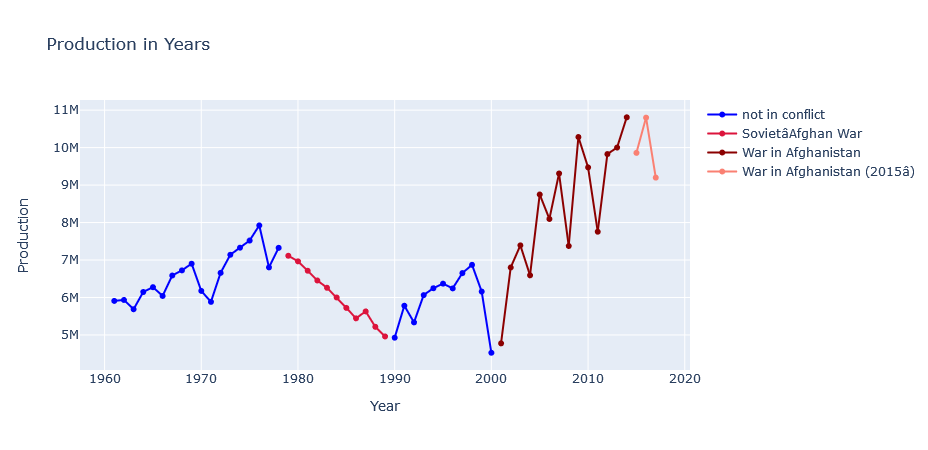

In [79]:
fig = go.Figure()

fig.add_trace(go.Scatter( x=prod_no_war["year"], y=prod_no_war["value_crop"],
                    mode='lines+markers',
                    name='not in conflict',
                    connectgaps=False,
                    line=dict(color='blue', width=2)))

for i in range(len(list_conflicts)):
    prod_war = dfs[i]
    fig.add_trace(go.Scatter( x=prod_war["year"], y=prod_war["value_crop"],
                    mode='lines+markers',
                    name=list_conflicts[i],
                    connectgaps=False,
                    line=dict(color=colors_list[i], width=2)))


fig.update_layout(title='Production in Years',
                   xaxis_title='Year',
                   yaxis_title='Production')
              
fig.show()

In [ ]:
final_wars_df.head()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

In [10]:
# Retrieve geolocations of country centroids

# Set folder name
file_path = '../pandas_dfs/'

# Set filenames
centroids_file = 'country_centroids_df.csv'

# Read the files
country_centroids_df = pd.read_csv(file_path + centroids_file, encoding='latin-1')

In [45]:
# Create df for selected wars
wars_selected = [];
for i in range(len(list_conflicts)):
    wars_selected.append(final_wars_df.loc[final_wars_df['name'] == list_conflicts[i]].reset_index(drop=True))

In [103]:
wars_selected[1]

,name,country,end_year,is_state,location,participant,start_year
0,War in Afghanistan,Afghanistan,2014-01-01,True,Afghanistan,United Kingdom,2001-01-01
1,War in Afghanistan,Afghanistan,2014-01-01,True,Afghanistan,Canada,2001-01-01
2,War in Afghanistan,Afghanistan,2014-01-01,True,Afghanistan,Islamic Emirate of Afghanistan,2001-01-01
3,War in Afghanistan,Afghanistan,2014-01-01,True,Afghanistan,Australia,2001-01-01
4,War in Afghanistan,Afghanistan,2014-01-01,True,Afghanistan,United States of America,2001-01-01
5,War in Afghanistan,Afghanistan,2014-01-01,True,Afghanistan,Germany,2001-01-01
6,War in Afghanistan,Afghanistan,2014-01-01,False,Afghanistan,Turkistan Islamic Party,2001-01-01
7,War in Afghanistan,Afghanistan,2014-01-01,False,Afghanistan,Turkistan Islamic Party,2001-01-01


In [68]:
fig3 = go.Figure()
for j in range(len(list_conflicts)):
    wars_df = wars_selected[j]
    for i in range(len(wars_df)):
        try:

            fig3.add_trace(
                go.Scattergeo(
                    locationmode = 'country names',
                    lon = ([country_centroids_df.loc[country_centroids_df['country'] == wars_df['participant'][i]]['longitude'].values[0], 
                       country_centroids_df.loc[country_centroids_df['country'] == wars_df['country'][i]]['longitude'].values[0]]),
                    lat = ([country_centroids_df.loc[country_centroids_df['country'] == wars_df['participant'][i]]['latitude'].values[0], 
                       country_centroids_df.loc[country_centroids_df['country'] == wars_df['country'][i]]['latitude'].values[0]]),
                    mode = 'lines',  
                    line = dict(width = 2,color =colors_list[j]),
            )
        )
        except:
            pass


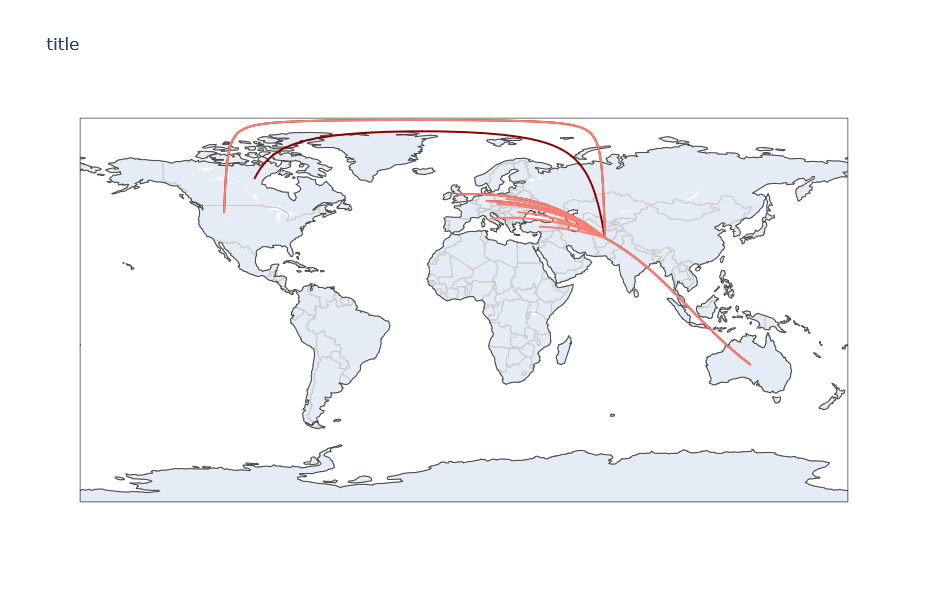

In [102]:
fig3.update_layout(
    title_text = 'title',
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'world',
        projection_type = 'equirectangular',
        showland = True,
        showcountries = True,
        #landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
    width=900,
    height=600,
)

fig3.show()